###Import the relevant libraries

In [ ]:
from ast import Num
import pandas as pd
import glob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

###Reading the Database

In [ ]:
dataset = glob.glob('/content/youtube-dataset/*.csv')
dataset

['/content/youtube-dataset/Youtube01.csv',
 '/content/youtube-dataset/Youtube02.csv',
 '/content/youtube-dataset/Youtube05.csv',
 '/content/youtube-dataset/Youtube04.csv',
 '/content/youtube-dataset/Youtube03.csv']

In [ ]:
all_df = []

for i in dataset:
  all_df.append(pd.read_csv(i).drop(['COMMENT_ID','AUTHOR','DATE'], axis = 1))


In [ ]:
all_df[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [ ]:
data = pd.concat(all_df, axis=0, ignore_index=True)
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,Like this comment for no reason﻿,1
1951,love this song﻿,0
1952,this song is awesome. these guys are the best....,1
1953,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


In [ ]:
data.isnull().sum()

,0
CONTENT,0
CLASS,0


In [ ]:
data['CLASS'].value_counts()

,count
CLASS,
1,1004
0,951


###Sample 1

In [ ]:
message_sample = ['This is a dog']

vectorizer_sample = CountVectorizer()
vectorizer_sample.fit(message_sample)
vectorizer_sample.transform(message_sample).toarray()

array([[1, 1, 1]])

In [ ]:
vectorizer_sample.get_feature_names_out()

array(['dog', 'is', 'this'], dtype=object)

In [ ]:
vectorizer_sample.transform(['This is a cat']).toarray()

array([[0, 1, 1]])

###Sample 2

In [ ]:
message_sample2 = ['This is a dog and that is a dog', 'This is a cat']

vectorizer_sample2 = CountVectorizer()
vectorizer_sample2.fit_transform(message_sample2).toarray()

array([[1, 0, 2, 2, 1, 1],
       [0, 1, 0, 1, 0, 1]])

In [ ]:
vectorizer_sample2.get_feature_names_out()

array(['and', 'cat', 'dog', 'is', 'that', 'this'], dtype=object)

In [ ]:
vectorizer_sample2.transform(['Those are birds']).toarray()

array([[0, 0, 0, 0, 0, 0]])

###Defining the inputs and the target.

In [ ]:
inputs = data['CONTENT']
target = data['CLASS']

###Creating the train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,
                                                 test_size=0.2,
                                                 random_state=365,
                                                 stratify = target)

In [ ]:
y_train.value_counts(normalize = True)

,proportion
CLASS,
1,0.513427
0,0.486573


In [ ]:
y_test.value_counts(normalize = True)

,proportion
CLASS,
1,0.514066
0,0.485934


###Tokenizing the YouTube comments

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
x_train_transform = vectorizer.fit_transform(x_train)
x_test_transform = vectorizer.transform(x_test)

In [ ]:
x_train_transform.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train_transform.shape

(1564, 3840)

In [ ]:
x_test_transform.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_test_transform.shape

(391, 3840)

###Performing the Classification

In [ ]:
clf = MultinomialNB()

In [ ]:
clf.fit(x_train_transform,y_train)

MultinomialNB()

In [ ]:
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

###Performing the evaluation on the test dataset

In [ ]:
y_test_pred = clf.predict(x_test_transform)

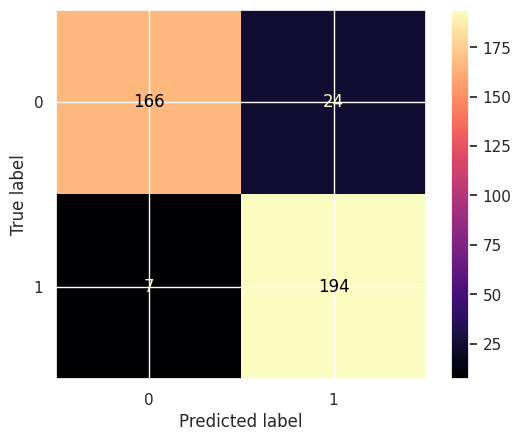

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test,y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

In [ ]:
print(classification_report(y_test,y_test_pred,target_names = ['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.96      0.87      0.91       190
        Spam       0.89      0.97      0.93       201

    accuracy                           0.92       391
   macro avg       0.92      0.92      0.92       391
weighted avg       0.92      0.92      0.92       391



###Creating probability-distribution figures

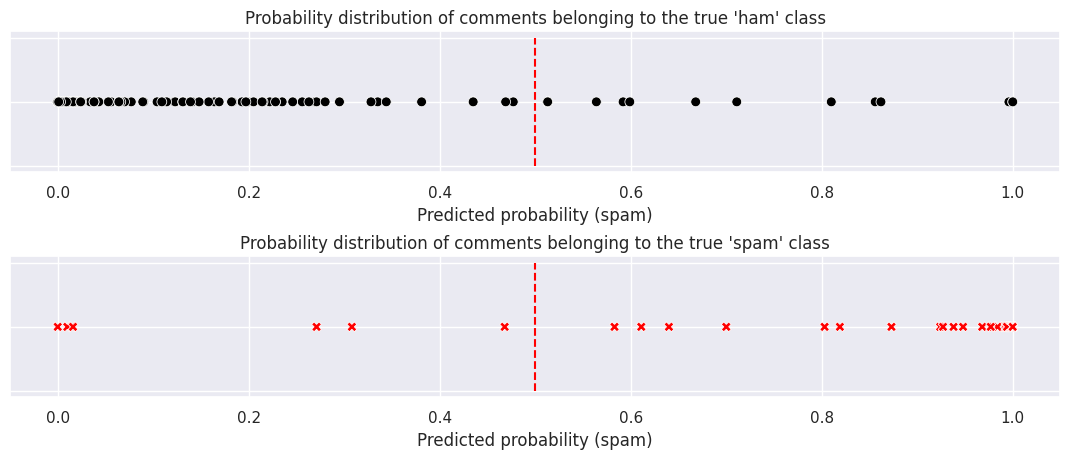

In [ ]:
spam_proba = clf.predict_proba(x_test_transform).round(3)[:,1];

df_scatter = pd.DataFrame()

df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

df_scatter = df_scatter.reset_index(drop = True)

palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

sns.set()

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad = 3)

sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_0.shape[0]),
                data = df_scatter_0,
                hue = 'True class',
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False,
                ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');


sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_1.shape[0]),
                hue = 'True class',
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False,
                ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

###Making Predictions

In [ ]:
predict_data = vectorizer.transform(['This song is amazing!',
                                     'You can win 1m dollars right now, just click here!!!'])

In [ ]:
clf.predict(predict_data)

array([0, 1])